# Seccion I - Objetivo: Predecir el Genero

> Lleve a cabo el algoritmo k-NN (k=3) para la clasificacion de los datos del dataset de pruebas a partir de los datos del dataset de entrenamiento. Favor refererirse a la hora * "Handwritten exercise" * del archivo de Excel para encontrar los datos que utilizara.


In [5]:
import pandas as pd
import numpy as np
from knn import KNN
import matplotlib.pyplot as plt

In [6]:
#IMPORTANDO DATOS

PATH = '/home/albertdipre/Desktop/MachineLearning/P2/knn_dataset.xlsx'
handwritten_exercise_data = pd.read_excel(PATH,sheet_name="Handwritten_exercise",usecols=[0,1,2,3,4,7,8,9,10])
print(handwritten_exercise_data.head())

  Train Set: Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4      Test Set:  \
0         id     gender     height     weight       alco  height_sample   
1          0          2        168         62          0            163   
2          1          1        156         85          0            175   
3          2          1        165         64          0            184   
4          3          2        169         82          0            NaN   

      Unnamed: 8   Unnamed: 9 Unnamed: 10  
0  weight_sample  alco_sample      gender  
1             66            1           ?  
2             76            0           ?  
3            111            0           ?  
4            NaN          NaN         NaN  


In [7]:
# Datos de entrenamiento
train_data = np.array(handwritten_exercise_data)
train_data1 = np.array(train_data[1:,2].reshape(15,1))
train_data2 = np.array(train_data[1:,3].reshape(15,1))
train_data3 = np.array(train_data[1:,4].reshape(15,1))
train_data = np.concatenate((train_data1,train_data2,train_data3),axis = 1).transpose()
print(train_data.shape)


(3, 15)


In [8]:
# Clases de entrenamiento

genero = np.array(handwritten_exercise_data)
genero = genero[1:,1]
genero = np.uint8(genero)
print(genero)

[2 1 1 2 1 1 1 2 1 1 1 2 2 1 2]



> Luego probar con un codigo propio el cual, dado un valor de k especificado por el usuario, implemente k-NN para claasificacion del dataset de entrenamiento(Hoja de Programing Exercise)

In [9]:
nuevos_datos = np.array(handwritten_exercise_data)
nuevos_datos = nuevos_datos[1:4,5:8]
print(nuevos_datos.shape)

(3, 3)


/tmp/ipykernel_17396/3533939686.py:15: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('hombres','mujeres')


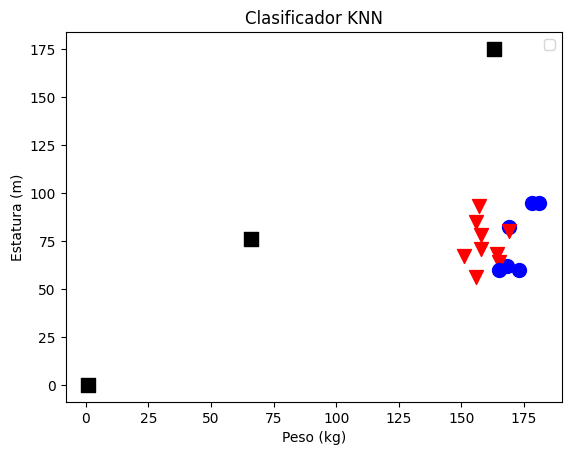

In [11]:
for i in range(train_data.shape[1]):
    if genero[i]==1:
        marcar = 'v'
        color = 'red'
    else:
        marcar ='o'
        color ='blue'
    plt.scatter(x=train_data[0,i],y=train_data[1,i],c = color,s =100,marker = marcar)
for j  in range(nuevos_datos.shape[1]):
    plt.scatter(x=nuevos_datos[0,j],y=nuevos_datos[1,j],c = 'black',s =100,marker = 's')
    
plt.xlabel('Peso (kg)')
plt.ylabel('Estatura (m)')
plt.title('Clasificador KNN')
plt.legend('hombres','mujeres')

In [12]:
clasificador =KNN(k=3)
clasificador.aprendizaje(train_data,genero)
clasificar = clasificador.clasificacion(nuevos_datos)
print('generos', clasificar)

generos [2, 1, 1]


# RESULTADOS
> Se observa como la clasificacion es obtenida al hacer knearest neighbors para la clasificacion de nuevos datos a partir de datos aprendidos, dado que no tenemos una data la cual es el testeo de "Y" no podemos comparar con totalidad la validacion de nuestro modelo, sin embargo al comparar con los resultados del grupo se puede observar como a todos nos dio igual tanto en python como en matlab
